In [1]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/home/jerome/Documents/CSV FILE/KNN.csv")

In [3]:
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,TXN_38158,USER_2510,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,...,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [4]:
df.drop("Transaction_ID", axis = 1, inplace= True)

In [5]:
df.drop("User_ID", axis = 1, inplace= True)

In [6]:
df.drop("Timestamp", axis = 1, inplace= True)

In [7]:
df

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0,0,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0,0,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,0,1,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0,0,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

Transaction_Amount              0
Transaction_Type                0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

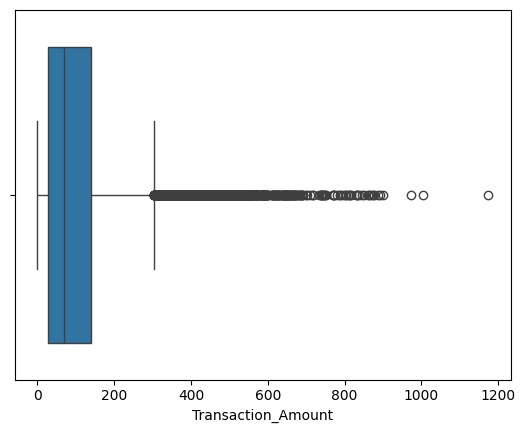

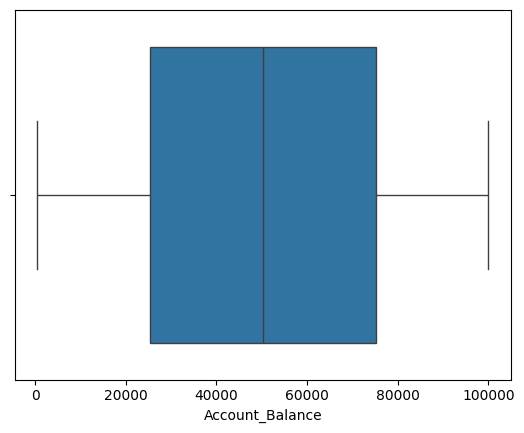

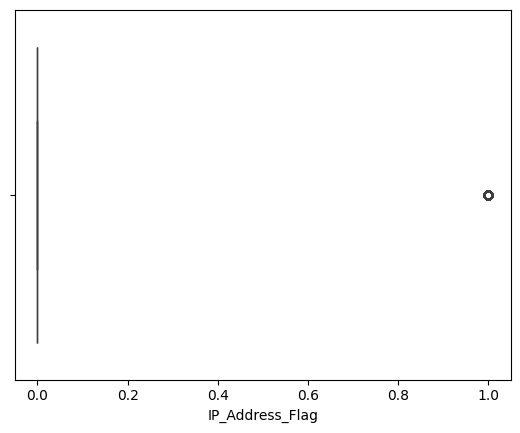

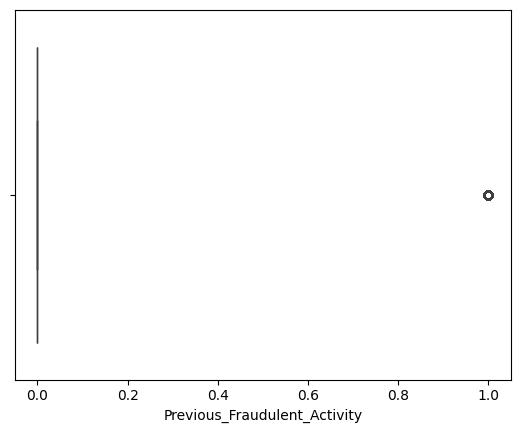

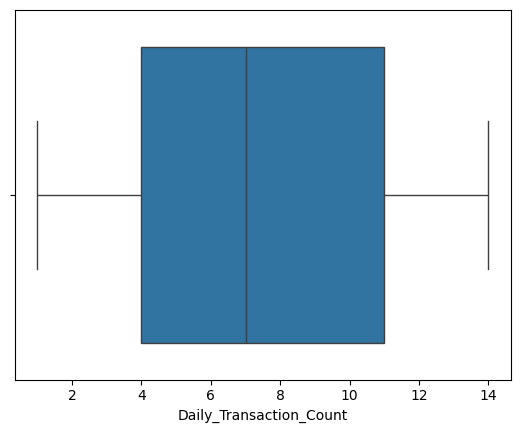

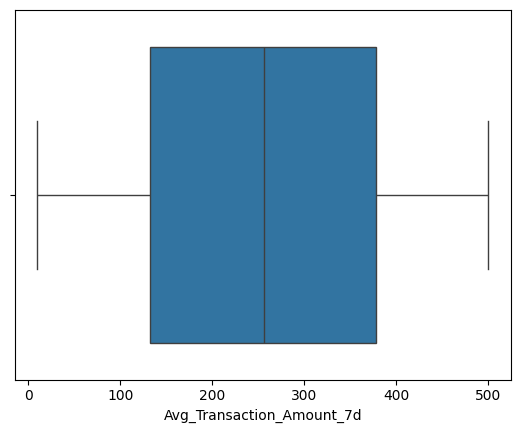

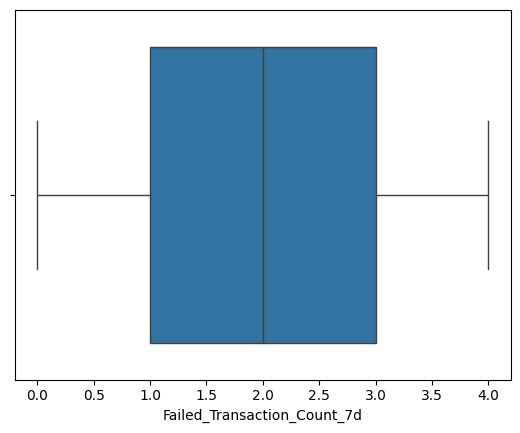

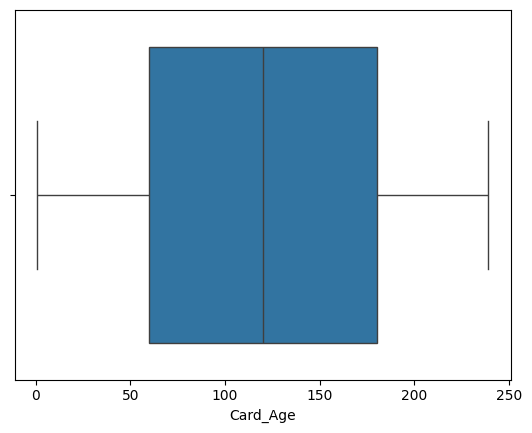

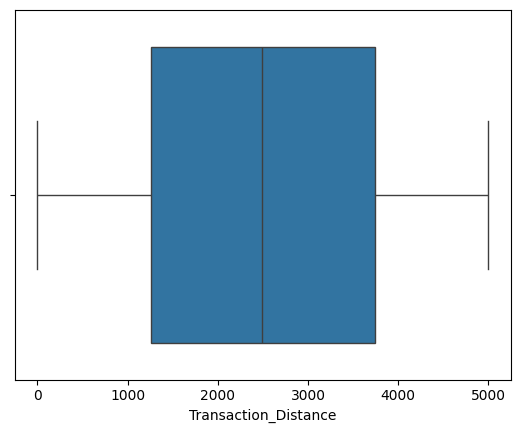

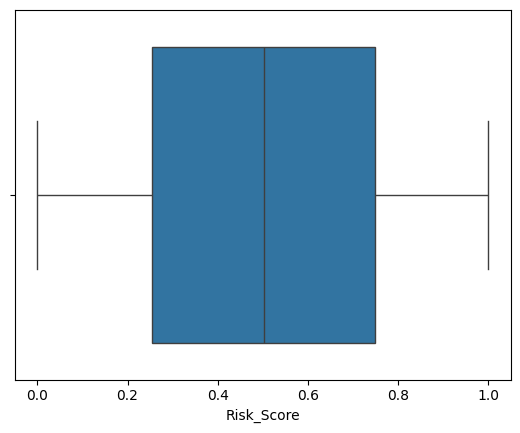

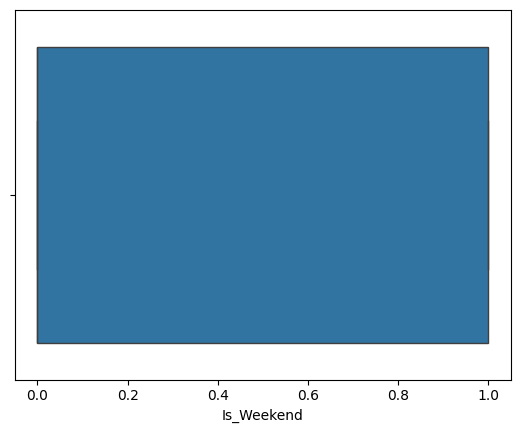

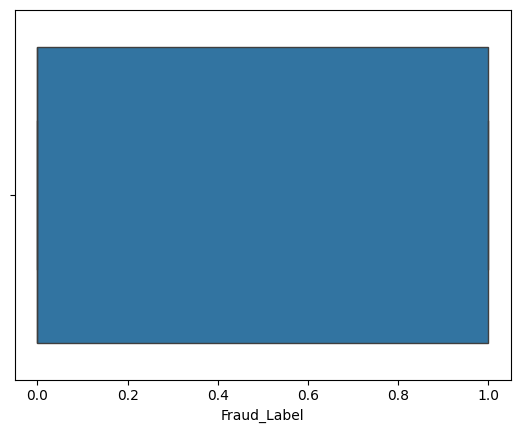

In [10]:
num = df.select_dtypes("number")
cat = df.select_dtypes("object")
for x in num.columns:
    sns.boxplot(x = num[x])
    plt.show()

In [11]:
le = LabelEncoder()
for y in cat:
    df[y] = le.fit_transform(df[y])

In [12]:
df

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3,93213.17,0,3,4,0,0,7,437.63,3,0,65,883.17,0,0.8494,0,0
1,1.19,1,75725.25,1,2,0,0,0,13,478.76,4,2,186,2203.36,3,0.0959,0,1
2,28.96,2,1588.96,2,1,3,0,0,14,50.01,4,3,226,1909.29,0,0.8400,0,1
3,254.32,0,76807.20,2,2,0,0,0,8,182.48,4,3,76,1311.86,1,0.7935,0,1
4,31.28,3,92354.66,1,1,1,0,1,14,328.69,4,2,140,966.98,3,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,2,76960.11,1,4,0,0,0,2,389.00,3,0,98,1537.54,2,0.1493,1,0
49996,126.15,3,28791.75,1,4,0,0,0,13,434.95,4,3,93,2555.72,0,0.3653,0,1
49997,72.02,2,29916.41,0,1,0,0,1,1,369.15,2,3,114,4686.59,0,0.5195,0,0
49998,64.89,1,67895.67,1,4,1,0,0,13,242.29,4,1,72,4886.92,0,0.7063,0,1


In [13]:
X =  df.drop(columns="Fraud_Label")
y = df["Fraud_Label"]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 45, stratify= y)

In [15]:
sm = SMOTE()
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

In [16]:
xg = XGBClassifier()
param_grid = {
    'n_estimators': [40,50,60],
    'max_depth': [5,6,7],
    'learning_rate':[0.2,0.3],
    'subsample': [0.8]
}

In [17]:
gs = GridSearchCV(xg,param_grid= param_grid, scoring = 'f1', cv = 10)
gs.fit(X_train_resample,y_train_resample)
print(gs.best_estimator_)
print(gs.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)
0.946856096291641


In [ ]:
model = gs.best_estimator_

from sklearn.metrics import classification_report,confusion_matrix
mofel.fit(X_train)

NameError: name 'mofel' is not defined